## Inference

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

with open("data/input.txt", "r") as text:
    text = text.read()

# get unique chars in training data
chars = sorted(list(set(text)))
vocab_size = len(chars)

# map string to integers (idx)
stoi = { ch:i for i,ch in enumerate(chars) } # string to int
itos = { i:ch for i,ch in enumerate(chars) } # int to string

# char encode/decode
encode = lambda s: [stoi[c] for c in s] # string -> list of ints
decode = lambda l: ''.join([itos[i] for i in l]) # list of ints -> string

device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Load Checkpoint

In [3]:
from model import LanguageModel

model = LanguageModel()
model.to(device)

# if you have GPU
# model.load_state_dict(torch.load('checkpoints/model.pth'))

# if you have CPU 
model.load_state_dict(torch.load('checkpoints/model.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
# generate text
starting_prompt = torch.zeros((1, 1), dtype=torch.long, device=device)
max_new_tokens = 250

result, probs_list = model.generate(starting_prompt, max_new_tokens=max_new_tokens)
result = decode(result[0].tolist())
print(result)


In heaven blench batta, to the patrous scape
Of what sets ames?

MISTRESS OVERDONE:
What you have I amain'd.

MERCUTIO:
Hold, is there foul the night,
Ounly, I do see thing Ratct I am levy.
Would think, from your heart, weigh anger?

TYBALLT:
No, for


## Plot top 5 probable words vs chosen word

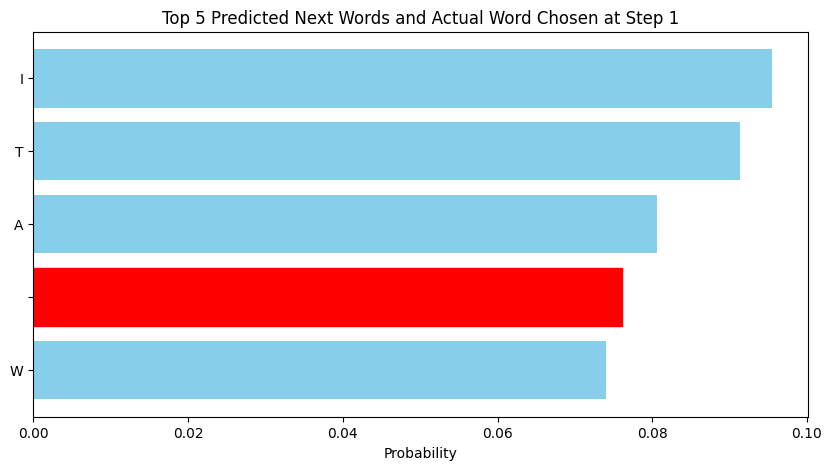

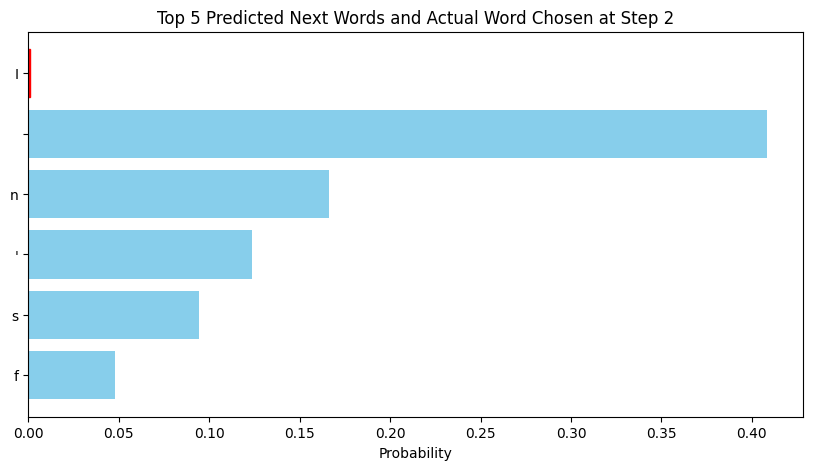

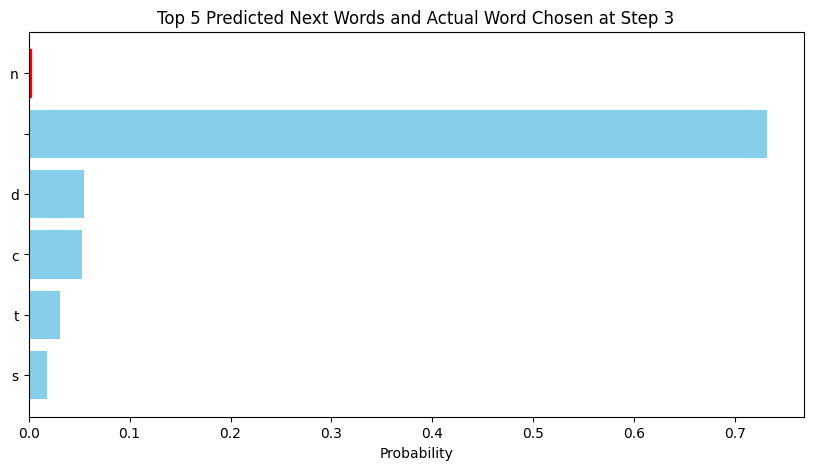

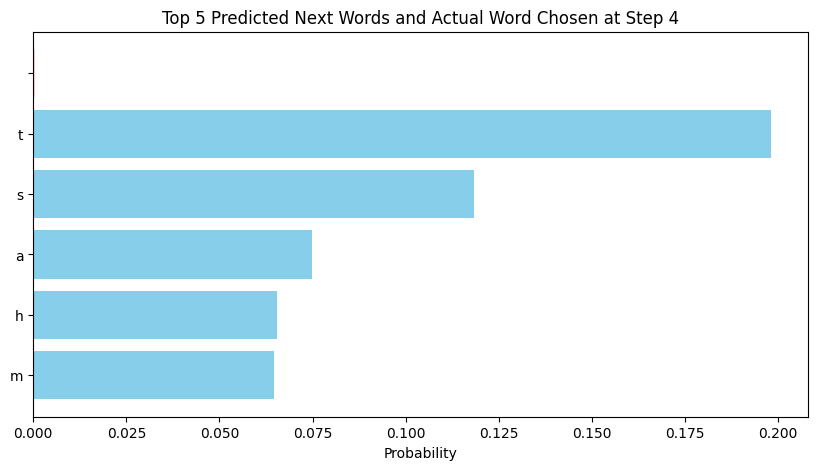

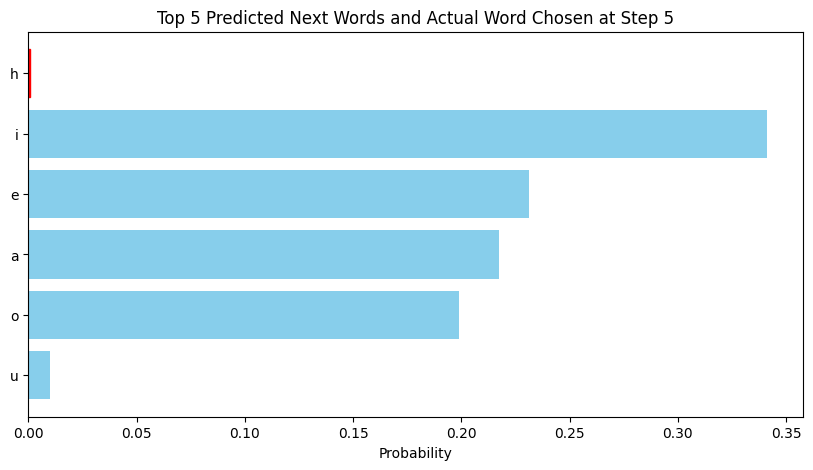

In [6]:
for new_token_idx in range(min(5, max_new_tokens)):
    # Convert tensor to numpy array
    probs = probs_list[new_token_idx][0].cpu().detach().numpy() # 0th batch

    # Get top 10 words with highest probabilities
    top10_indices = np.argsort(probs)[-5:]
    top10_probs = probs[top10_indices]
    top10_words = [itos[i] for i in top10_indices]

    # Get the actual word chosen and its probability
    actual_word = result[new_token_idx] # get the word at the current index
    actual_prob = probs[stoi[actual_word]]

    # Add the actual word to the list if it's not already in the top 10
    if actual_word not in top10_words:
        top10_words.append(actual_word)
        top10_probs = np.append(top10_probs, actual_prob)

    # Plot
    plt.figure(figsize=(10,5))
    bars = plt.barh(top10_words, top10_probs, color='skyblue')

    # Highlight the actual word chosen in a different color
    for bar, word in zip(bars, top10_words):
        if word == actual_word:
            bar.set_color('red')

    plt.xlabel('Probability')
    plt.title(f'Top 5 Predicted Next Words and Actual Word Chosen at Step {new_token_idx+1}')
    plt.show()


## Plot probabilities of most probable word vs chosen word

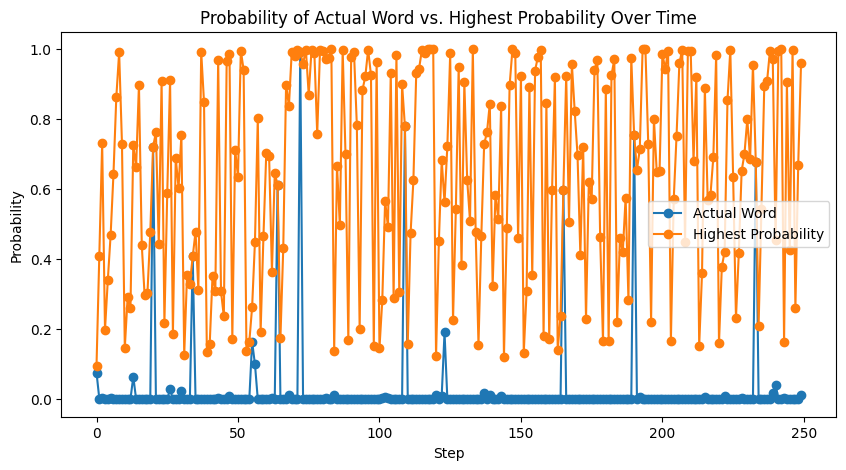

In [5]:


# Initialize lists to store probabilities
actual_probs = []
max_probs = []

for new_token_idx in range(max_new_tokens):
    # Convert tensor to numpy array
    probs = probs_list[new_token_idx][0].cpu().detach().numpy() # 0th batch

    # Get the actual word chosen and its probability
    actual_word = result[new_token_idx] # get the word at the current index
    actual_prob = probs[stoi[actual_word]]
    actual_probs.append(actual_prob)

    # Get the maximum probability
    max_prob = np.max(probs)
    max_probs.append(max_prob)

# Create a time axis
time = np.arange(max_new_tokens)

# Plot
plt.figure(figsize=(10,5))
plt.plot(time, actual_probs, label='Actual Word', marker='o')
plt.plot(time, max_probs, label='Highest Probability', marker='o')
plt.xlabel('Step')
plt.ylabel('Probability')
plt.title('Probability of Actual Word vs. Highest Probability Over Time')
plt.legend()
plt.show()
